- OpenCV is often used in practice with other machine learning and deep learning libraries to produce interesting results.

- In this stage of the project you will create your own end-to-end pipeline - employing convolutional networks in keras along with OpenCV - to apply a "selfie" filter to streaming video and images.

- here are 15 keypoints marked in each image. They mark important areas of the face - the eyes, corners of the mouth, the nose, etc. Facial keypoints can be used in a variety of machine learning applications from face and emotion recognition to commercial applications like the image filters popularized by Snapchat.

- The training dataset contains several thousand 96×96 grayscale images of cropped human faces, along with each face's 15 corresponding facial keypoints (also called landmarks) that have been placed by hand, and recorded in (x,y) coordinates. 


In [1]:
from utils import *

# Load training set
X_train, y_train = load_data()
print("X_train.shape == {}".format(X_train.shape))
print("y_train.shape == {}; y_train.min == {:.3f}; y_train.max == {:.3f}".format(
    y_train.shape, y_train.min(), y_train.max()))

# Load testing set
X_test, _ = load_data(test=True)
print("X_test.shape == {}".format(X_test.shape))

Using TensorFlow backend.


X_train.shape == (2140, 96, 96, 1)
y_train.shape == (2140, 30); y_train.min == -0.920; y_train.max == 0.996
X_test.shape == (1783, 96, 96, 1)


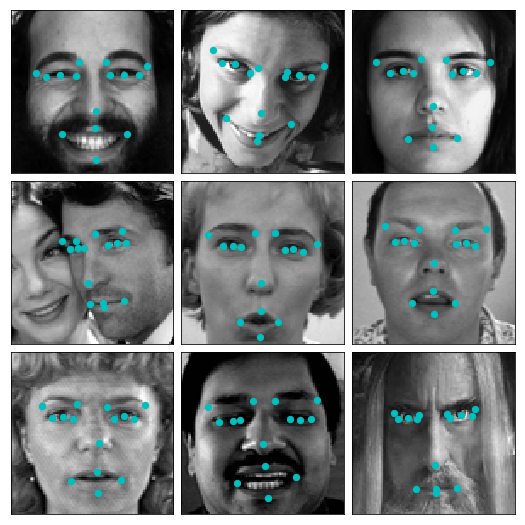

In [2]:
# visualize the training data.

import matplotlib.pyplot as plt
%matplotlib inline

# plot_data() function form utils
fig = plt.figure(figsize=(7,7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_train[i], y_train[i], ax)

In [3]:
# Import deep learning resources from Keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout
from keras.layers import Flatten, Dense


## TODO: Specify a CNN architecture
# Your model should accept 96x96 pixel graysale images in
# It should have a fully-connected output layer with 30 values (2 for each facial keypoint)

model = Sequential()
model.add(Convolution2D(32, (5, 5), input_shape=(96,96,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Convolution2D(30, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(30))

# Summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 92, 92, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 128)       0         
__________

In [6]:
model.layers

### Compile and train the model


In [7]:
# compile and train the model

from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

## TODO: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])



In [8]:
## TODO: Train the model
hist = model.fit(X_train, y_train, epochs=2, batch_size=200, verbose=1, validation_split=0.2)

## TODO: Save the model as model.h5
model.save('my_model.h5')

Train on 1712 samples, validate on 428 samples
Epoch 1/2
1712/1712 [==============================] - 65s 38ms/step - loss: 0.1245 - acc: 0.2850 - val_loss: 0.0918 - val_acc: 0.0000e+00
Epoch 2/2
1712/1712 [==============================] - 64s 37ms/step - loss: 0.0740 - acc: 0.0018 - val_loss: 0.0550 - val_acc: 0.0000e+00


dict_keys(['loss', 'val_acc', 'val_loss', 'acc'])


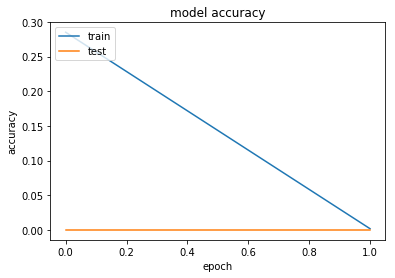

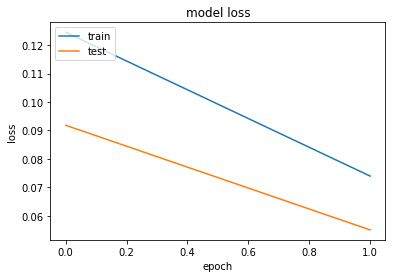

In [9]:

## TODO: Visualize the training and validation loss of your neural network

print(hist.history.keys())

# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### visualize a subset of the test prediction

In [ ]:
y_test = model.predict(X_test)
fig = plt.figure(figsize=(7,7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_test[i], y_test[i], ax)

### Complete the pipeline

In [ ]:
# Load in color image for face detection
image = cv2.imread('images/obamas4.jpg')


# Convert the image to RGB colorspace
image_copy = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# plot our image
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('image copy')
ax1.imshow(image_copy)

In [ ]:
### TODO: Use the face detection code we saw in Section 1 with your trained conv-net 
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.25, 6)
for (x, y, w, h) in faces:
    
    # Grab the face 
    gray_face = gray[y:y+h, x:x+w]
    color_face = image_copy[y:y+h, x:x+w]
    
    # Normalize to match the input format of the model - Range of pixel to [0, 1]
    gray_normalized = gray_face / 255
    
    # Resize it to 96x96 to match the input format of the model
    original_shape = gray_face.shape # A Copy for future reference
    face_resized = cv2.resize(gray_normalized, (96, 96), interpolation = cv2.INTER_AREA)
    face_resized_copy = face_resized.copy()
    face_resized = face_resized.reshape(1, 96, 96, 1)
    
    # Predicting the keypoints using the model
    keypoints = model.predict(face_resized)
    
    # De-Normalize the keypoints values
    keypoints = keypoints * 48 + 48 
   
    # Map the Keypoints back to the original image
    face_resized_color = cv2.resize(color_face, (96, 96), interpolation = cv2.INTER_AREA)
    
    # print(keypoints[0])
    # print(keypoints[0][1::2])
    
    points = zip(keypoints[0][0::2], keypoints[0][1::2])

    for keypoint in points:
        cv2.circle(face_resized_color, keypoint, 1, (0,255,0), 1)

    image_copy[y:y+h, x:x+w] = cv2.resize(face_resized_color, original_shape, interpolation = cv2.INTER_CUBIC)
    
    cv2.rectangle(image_copy, (x, y), (x+w, y+h), (255,0,0), 2)
 
    ## TODO : Paint the predicted keypoints on the test image

fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Final Image')
ax1.imshow(image_copy)

### add a filter using facial keypoints to our laptop camera

In [ ]:

import cv2
import time 
from keras.models import load_model
def laptop_camera_go():
    # Create instance of video capturer
    cv2.namedWindow("face detection activated")
    vc = cv2.VideoCapture(0)

    # Try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # keep video stream open
    while rval:
        # plot image from camera with detections marked
        cv2.imshow("face detection activated", frame)
        
        # exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # exit by pressing any key
            # destroy windows
            cv2.destroyAllWindows()
            
            # hack from stack overflow for making sure window closes on osx --> https://stackoverflow.com/questions/6116564/destroywindow-does-not-close-window-on-mac-using-python-and-opencv
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()  

In [ ]:
# Run your keypoint face painter
laptop_camera_go()

In [ ]:
# Load in sunglasses image - note the usage of the special option
# cv2.IMREAD_UNCHANGED, this option is used because the sunglasses 
# image has a 4th channel that allows us to control how transparent each pixel in the image is
sunglasses = cv2.imread("images/sunglasses_4.png", cv2.IMREAD_UNCHANGED)

# Plot the image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(sunglasses)
ax1.axis('off');

In [ ]:

# Print out the shape of the sunglasses image
print ('The sunglasses image has shape: ' + str(np.shape(sunglasses)))

In [ ]:
# Print out the sunglasses transparency (alpha) channel
alpha_channel = sunglasses[:,:,3]
print ('the alpha channel here looks like')
print (alpha_channel)

# Just to double check that there are indeed non-zero values
# Let's find and print out every value greater than zero
values = np.where(alpha_channel != 0)
print ('\n the non-zero values of the alpha channel look like')
print (values)

In [ ]:

# Load in color image for face detection
image = cv2.imread('images/obamas4.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Plot the image
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original Image')
ax1.imshow(image)